<a href="https://colab.research.google.com/github/seelamGayatri2006/2311CS020606/blob/main/AD(MULTI_LINEAR_REGRESSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

Saving Cars.csv to Cars.csv
Cars.csv


In [ ]:
df=pd.read_csv(file_name)
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.corr(numeric_only=True)

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
#build model
import statsmodels.formula.api as smf


model=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

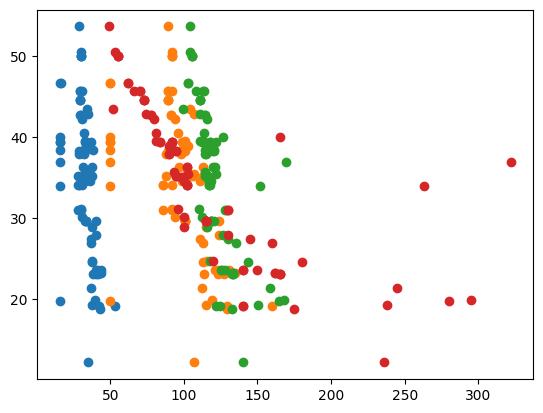

In [ ]:
#add scatter plots for the above code
import matplotlib.pyplot as plt
plt.scatter(df['WT'],df['MPG'])
plt.scatter(df['VOL'],df['MPG'])
plt.scatter(df['SP'],df['MPG'])
plt.scatter(df['HP'],df['MPG'])

In [ ]:
#Coefficients
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
ml_wv = smf.ols('MPG~WT+VOL',data = df).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [ ]:
(ml_wv.rsquared,ml_wv.rsquared_adj)

(0.2821095616445982, 0.2637021145072803)

In [ ]:
rsq_hp = smf.ols("HP ~ WT + VOL + SP", data=df).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)
rsq_wt = smf.ols("WT ~ HP + VOL + SP", data=df).fit().rsquared
vif_wt = 1 / (1 - rsq_wt)
rsq_vol = smf.ols("VOL ~ WT + HP + SP", data=df).fit().rsquared
vif_vol = 1 / (1 - rsq_vol)
rsq_sp = smf.ols("SP ~ WT + VOL + HP", data=df).fit().rsquared
vif_sp = 1 / (1 - rsq_sp)
d1 = {
    "Variables": ["HP", "WT", "VOL", "SP"],
    "VIF": [vif_hp, vif_wt, vif_vol, vif_sp],
}
vif_frame = pd.DataFrame(d1)
print(vif_frame)

  Variables         VIF
0        HP   19.926589
1        WT  639.533818
2       VOL  638.806084
3        SP   20.007639


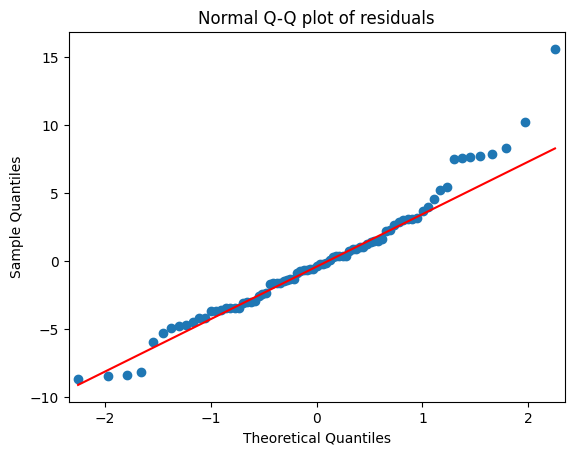

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [ ]:
list(np.where(model.resid>10))

[array([ 0, 76])]

Residual plot for Homoscedasticity


In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

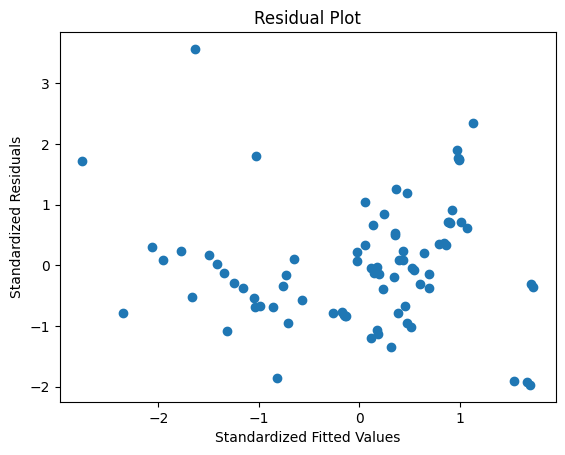

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

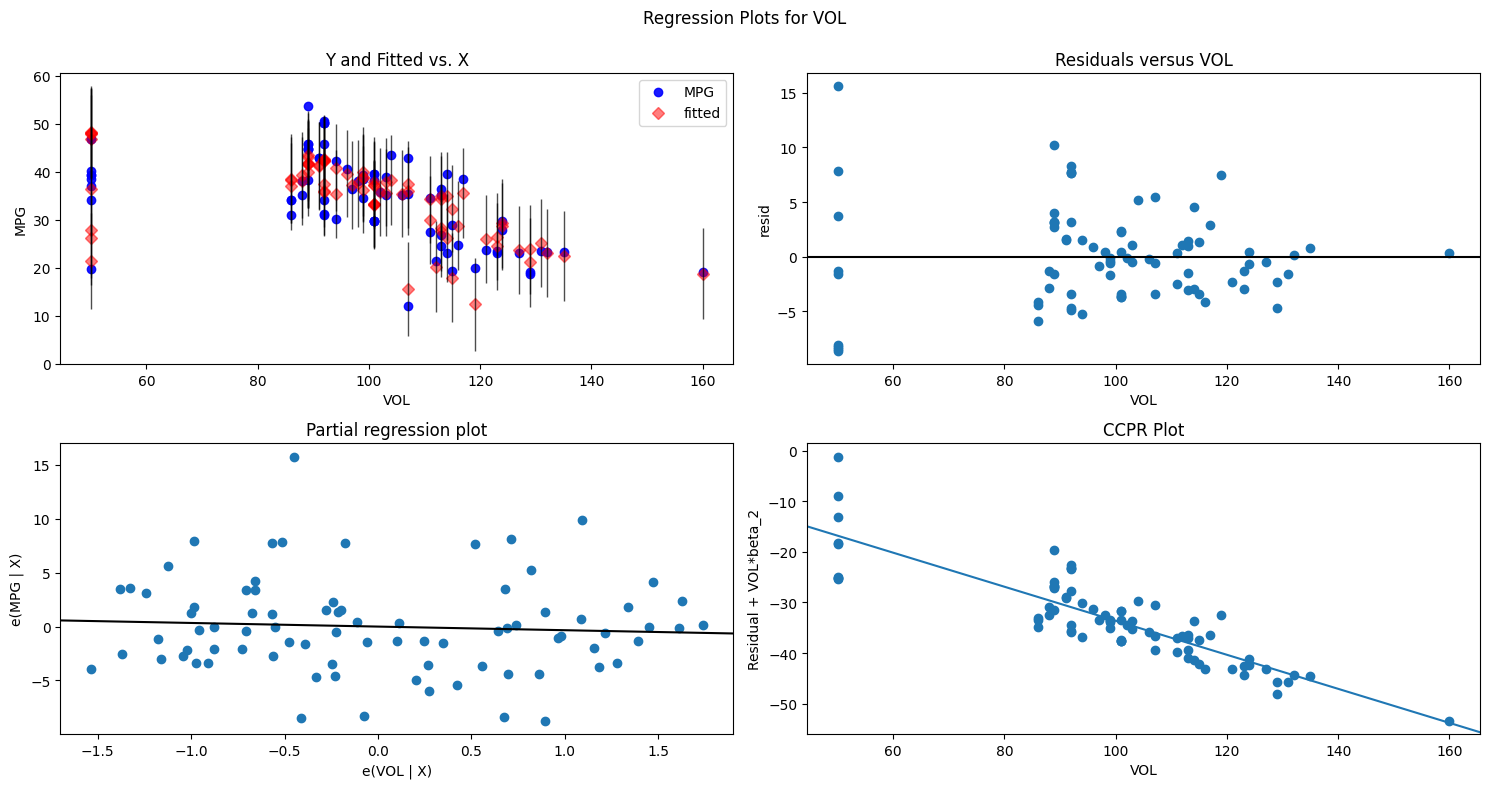

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

**Detecting Influncers/Outliers**

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

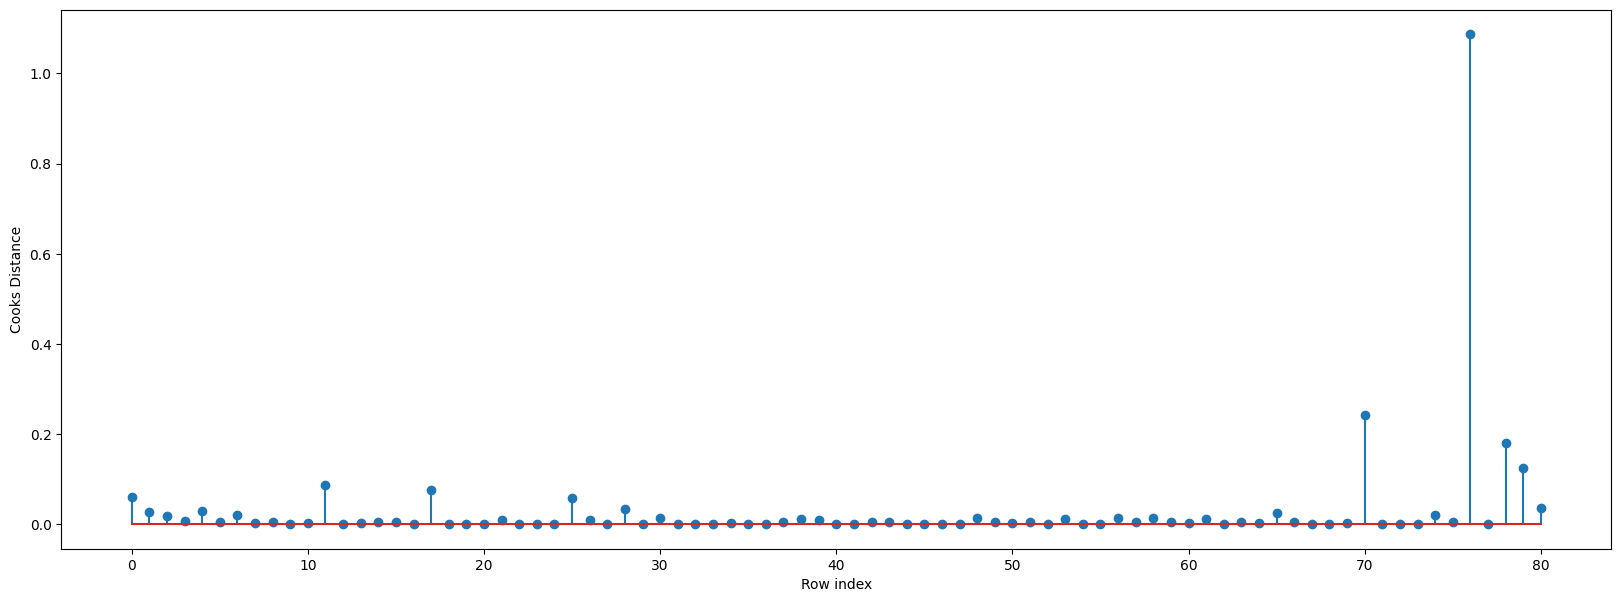

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

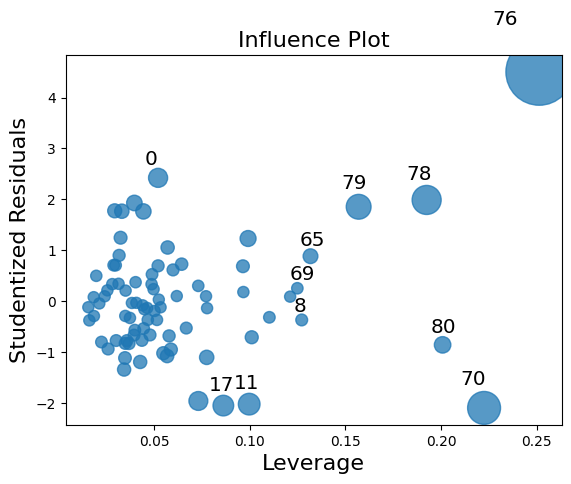

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()


In [ ]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.2222222222222222

In [ ]:
df[df.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df_new = pd.read_csv(file_name)

Saving Cars.csv to Cars (1).csv


In [ ]:
car1=df_new.drop(df_new.index[[70,76]],axis=0).reset_index()

In [ ]:
car1=car1.drop(['index'],axis=1)

In [ ]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [ ]:
model_ml_V=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

In [ ]:
final_ml_V=smf.ols('MPG~WT+VOL+SP+HP',data=car1).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161875290800862, 448.1093496537551)

In [ ]:
model_influence_v = final_ml_V.get_influence()  # Get influence for final_ml_V
(c_V, _) = model_influence_v.cooks_distance  # Extract Cook's distance from the correct influence object

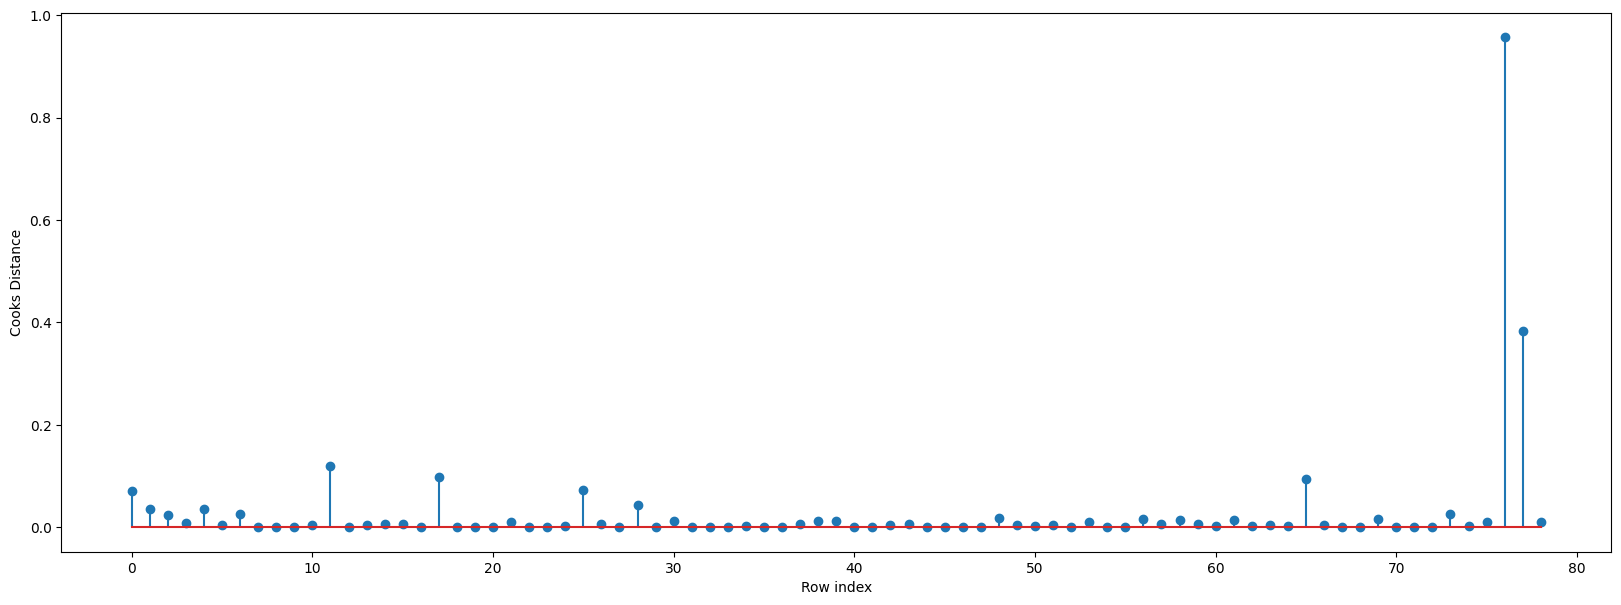

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.stem(np.arange(len(car1)), np.round(c_V, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv


In [ ]:
df.shape

(1436, 10)

In [ ]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df_new = pd.read_csv(file_name)
print(df_new.head())
print(df_new.columns)

df_new = df_new.dropna()

X = df_new[['Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears', 'Weight']]
y = df_new['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Saving Toyoto_Corrola.csv to Toyoto_Corrola (1).csv
   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170  
Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')
Mean Absolute Error: 998.5148131288653
Mean Squared Error: 1976089.9783065738
Root

In [ ]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 998.5148131288653
Mean Squared Error (MSE): 1976089.9783065738
Root Mean Squared Error (RMSE): 1405.7346756435134
R-squared: 0.8518982799282362


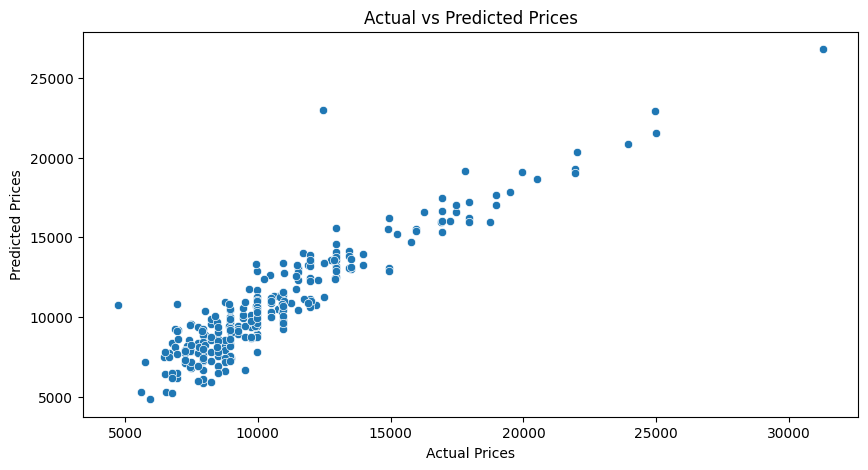

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [ ]:
df.corr


<bound method DataFrame.corr of         Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04     KM   HP  Doors  Cylinders  Gears  Weight  
0            23  46986   90      3          4      5    1165  
1            23  72937   90      3          4      5    1165  
2            24  41711   90      3          4      5    1165  
3            26  48000   90      3          4      5    1165  
4            30  38500   90      3          4      5    1170  
...         ...    ...  ...    ...        ...    ...     ...  
1431         69  20544   86      3          4      5    1025  
1432         72  19000   86      3          4      5    1015  
1433         71  17016   86      3          4      5    1015  
1434         70  16916   86      3          4      5    1015  
1435         76      1  110      5          4      5    1114  

[1436 rows x 10 columns]>